In [28]:
## Trying different clustering methods on the extracted feature arrays
## More note can be found in the trial and test note.docx



from time import time
from sklearn import metrics
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn.decomposition import PCA
# Next line to silence pyflakes. This import is needed.
Axes3D



# #import vectorized feature arrays for acts and scenes
act_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllAct_Features_Vectorize.txt',sep=',',header = None)
scene_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllScene_Features_Vectorize.txt',sep=',',header = None)
play_Vect = pd.read_csv('VectorizedFeatures/AllComplied/ALLPlay_Features_Vectorize.txt',sep=',',header = None)

#import LSA reduced vectorized feature arrays for acts and scenes
act_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Act_Features_Vectorize_LSA.txt',sep=',',header = None)
scene_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Scene_Features_Vectorize_LSA.txt',sep=',',header = None )
play_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Play_Features_Vectorize_LSA.txt',sep=',',header = None )

#import labels
act_Labels = pd.read_csv('LSA_VectorizedFeatures/act_feature_labels.txt',sep='\n',header = None)
scene_Labels= pd.read_csv('LSA_VectorizedFeatures/scene_feature_labels.txt',sep='\n',header = None )
play_Labels= pd.read_csv('LSA_VectorizedFeatures/play_feature_labels.txt',sep='\n',header = None )

# print(scene_Labels)
#     explained_variance = svd.explained_variance_ratio_.sum()
#     print(explained_variance)
act_Readability = pd.read_csv('Readability_Features/Act_Readability_Feature.txt',sep=',',header = None)
play_Readability = pd.read_csv('Readability_Features/Play_Readability_Feature.txt',sep=',',header = None)
scene_Readability = pd.read_csv('Readability_Features/Scene_Readability_Feature.txt',sep=',',header = None)


## Standardize matrix
def standardize(X):
    return StandardScaler().fit_transform(X)
act_Readability = standardize(act_Readability)
play_Readability = standardize(play_Readability)
scene_Readability = standardize(scene_Readability)
act_Vect = standardize(act_Vect)
play_Vect = standardize(play_Vect)
scene_Vect = standardize(scene_Vect)
act_Vect_LSA  = standardize(act_Vect_LSA )
play_Vect_LSA  = standardize(play_Vect_LSA )
scene_Vect_LSA  = standardize(scene_Vect_LSA )

In [2]:
## Function to get the annotation label
def get_play_number(X):
    result = []
    num = 0
    for i in range(len(X)):
        try:
            if X[0][i].split("_")[0] != X[0][i+1].split("_")[0]:
                num = num + 1            
            result.append(num)
        except:
            result.append(num)
    return result

play_annot = get_play_number(play_Labels)
act_annot = get_play_number(act_Labels)
scene_annot = get_play_number(scene_Labels)

In [25]:
## Adapated from http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#example-manifold-plot-compare-methods-py
## There are errors when apply to scene_Vect
## Visualize the plays by projecting them on non-linear plane to differ from the PCA projection
def manifold_projection(X,L=None, n_neighbors = 10,n_components = 2):
    
    
    fig = plt.figure(figsize=(25, 8))
    plt.suptitle("Manifold projection with %s , %i neighbors"
             % ("Shakespear plays", n_neighbors), fontsize=14)


    size = len(X)
    color = range(size)
    #color = annot
    color = [x/size for x in color]

    methods = ['standard', 'ltsa', 'hessian', 'modified']
    labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']
    

   

    for i, method in enumerate(methods):
        t0 = time()
        Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method=method).fit_transform(X)
        t1 = time()
        print("%s: %.2g sec" % (methods[i], t1 - t0))

        ax = fig.add_subplot(252 + i)
        plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
        plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
        plt.axis('tight')

    t0 = time()
    Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
    t1 = time()
    print("Isomap: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(257)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("Isomap (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')


    t0 = time()
    mds = manifold.MDS(n_components, max_iter=100, n_init=1)
    Y = mds.fit_transform(X)
    t1 = time()
    print("MDS: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(258)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("MDS (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')


    t0 = time()
    se = manifold.SpectralEmbedding(n_components=n_components,
                                    n_neighbors=n_neighbors)
    Y = se.fit_transform(X)
    t1 = time()
    print("SpectralEmbedding: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(259)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("t-SNE: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(250)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("t-SNE (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')

    plt.show()

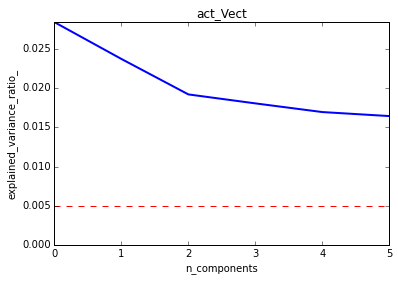


None


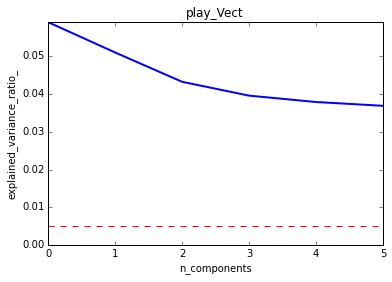


None


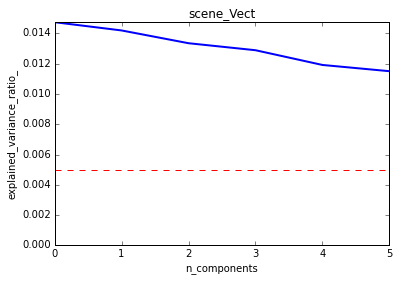


None


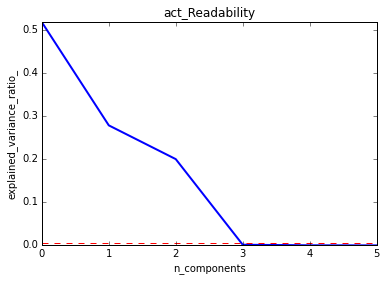


None


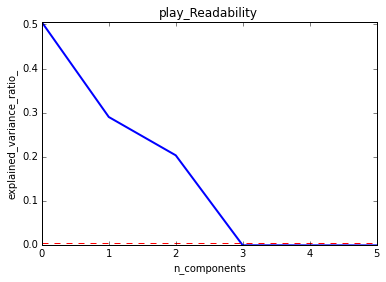


None


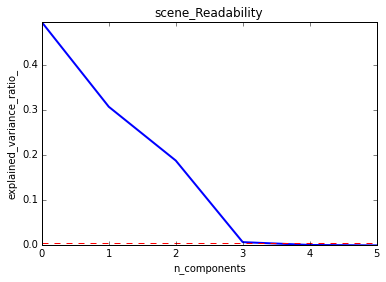


None


In [50]:
## Extract principal components , looking at variance explained of n components
# Using PCA
def getPCAPlot(X, title):
    pca = PCA()
    pca.fit(X)
    X_pca = pca.transform(X)

    # Plot the PCA spectrum
    plt.plot(pca.explained_variance_ratio_, linewidth=2)
    plt.axis('tight')
    plt.title(title)
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_ratio_')
    plt.axhline(y=0.005, color="red", linestyle="--")
    plt.xlim(0,5)
    plt.show()
    print('')

data = [act_Vect, play_Vect, scene_Vect,act_Readability,play_Readability,scene_Readability]
titles = ["act_Vect","play_Vect", "scene_Vect","act_Readability","play_Readability","scene_Readability"]
annot = [act_annot,play_annot,scene_annot,act_annot,play_annot,scene_annot]

    
# do for all data
for i in range(len(data)):
    print(getPCAPlot(data[i], titles[i]))

    
## results show that we need only 3 components  

PCA first 2 components projection: 0.29 sec


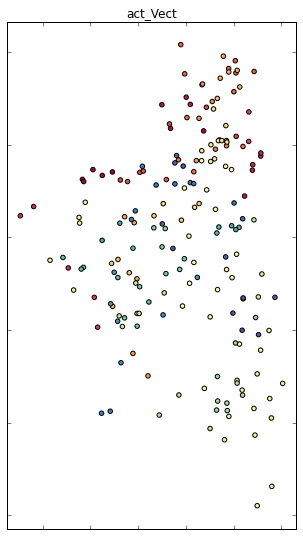

None
PCA first 2 components projection: 0.034 sec


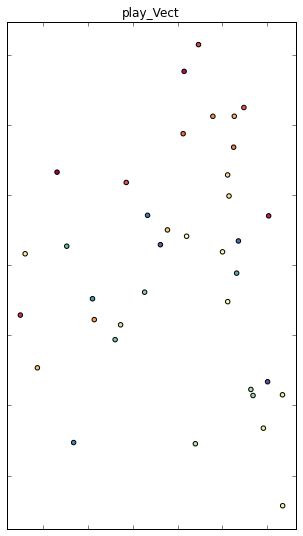

None
PCA first 2 components projection: 1.4 sec


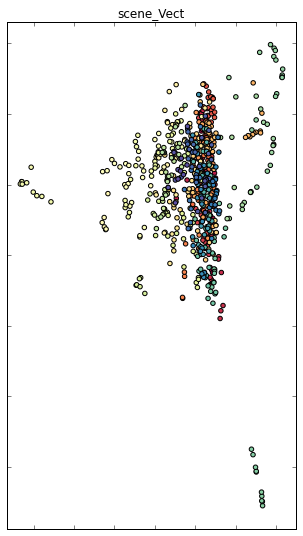

None
PCA first 2 components projection: 0.001 sec


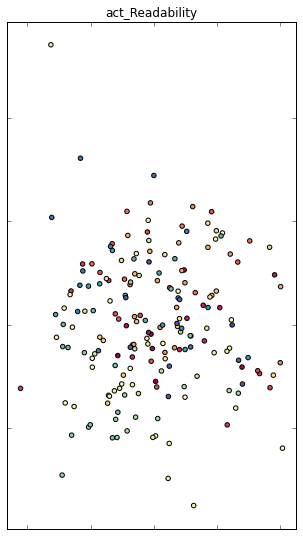

None
PCA first 2 components projection: 0 sec


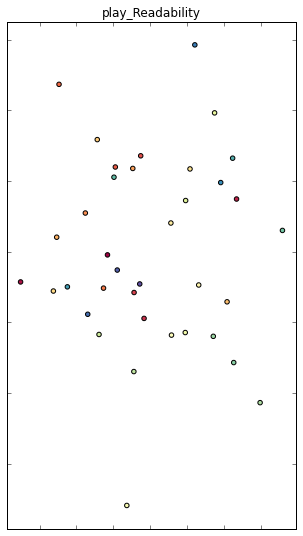

None
PCA first 2 components projection: 0.001 sec


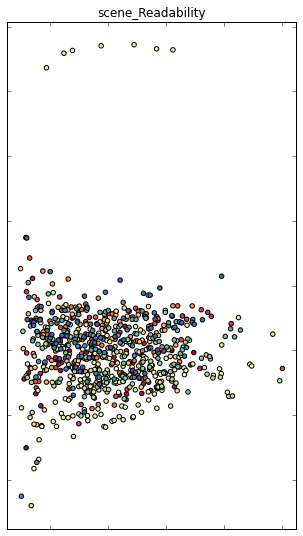

None


In [53]:
## Trying n components
def getPCA(X, n=3):
    pca = PCA(n)
    pca.fit(X)
    return pca.transform(X)


def PCA_projection(X,title,L=None,n_components = 3):
    if not (L is None):
        fig = plt.figure(figsize=(100, 20))
    else:
        fig = plt.figure(figsize=(30, 20))
    size = len(X)
    color = range(size)
    #color = annot
    color = [x/size for x in color]
    t0 = time()
    X = getPCA(X)
    t1 = time()
    print("PCA first 2 components projection: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(257)
    plt.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Spectral)
    #plt.title("PCA first 2 components projection (%.2g sec)" % (t1 - t0))
    plt.title(title)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (X[:, 0][i], X[:, 1][i]))
    plt.axis('tight')
    plt.show()
    
#PCA_projection(act_Vect,act_annot)
# do for all data
for i in range(len(data)):
    print(PCA_projection(data[i], titles[i],annot[i]))


Visualizing the act Readability features without labels... 

standard: 0.03 sec
ltsa: 0.039 sec
hessian: 0.082 sec
modified: 0.049 sec
Isomap: 0.028 sec
MDS: 0.09 sec
SpectralEmbedding: 0.094 sec
t-SNE: 0.32 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


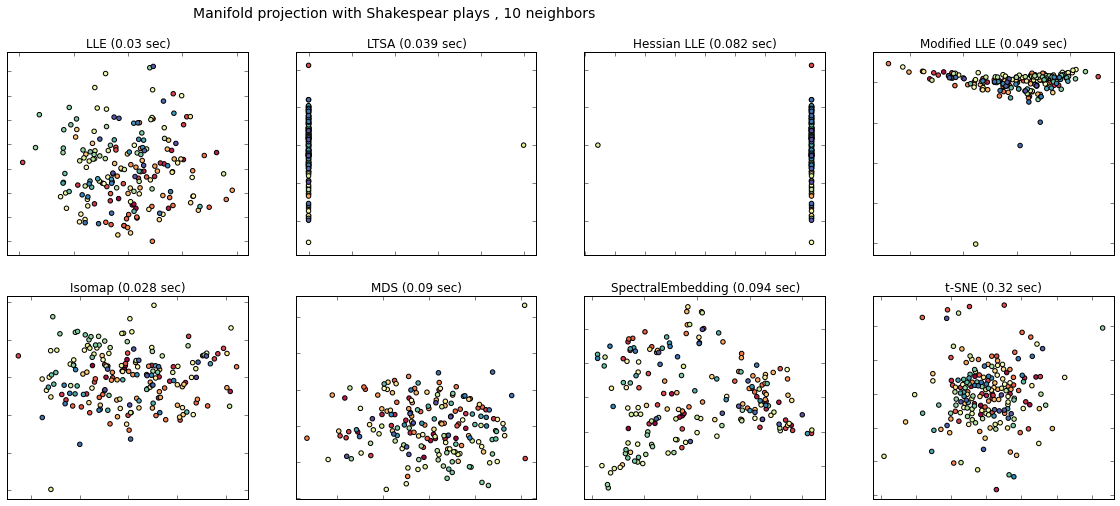


Visualizing the play Readability features without labels... 

standard: 0.013 sec
ltsa: 0.01 sec
hessian: 0.02 sec
modified: 0.012 sec
Isomap: 0.002 sec
MDS: 0.011 sec
SpectralEmbedding: 0.011 sec
t-SNE: 0.13 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


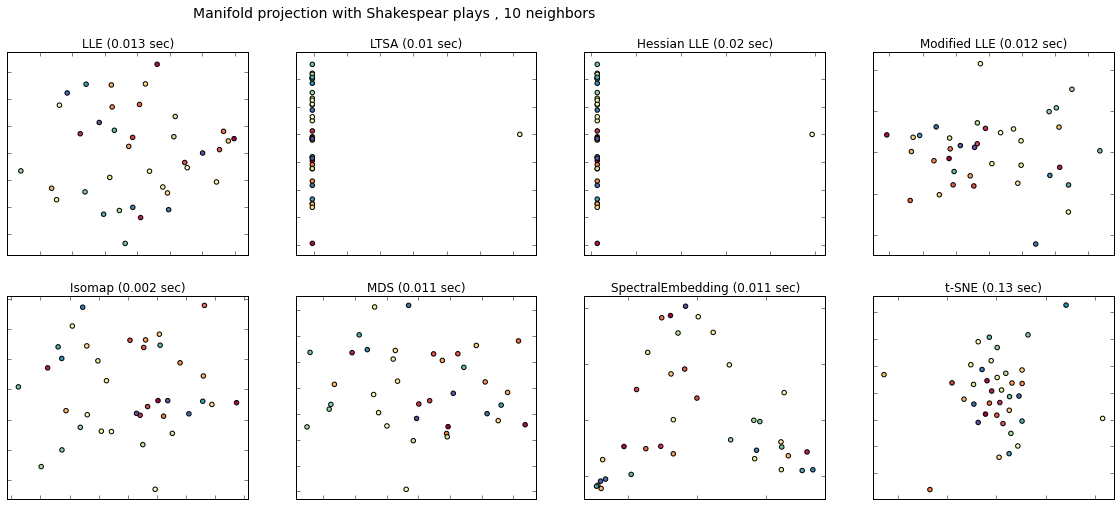

In [21]:
print("\nVisualizing the act Readability features without labels... \n")
manifold_projection(act_Readability)
print("\nVisualizing the play Readability features without labels... \n")
manifold_projection(play_Readability)
#print("\nVisualizing the scene Readability features without labels... \n")
#manifold_projection(scene_Readability)


Visualizing the play_Vect features without labels... 

standard: 0.064 sec
ltsa: 0.1 sec
hessian: 0.053 sec
modified: 0.066 sec
Isomap: 0.017 sec
MDS: 0.019 sec
SpectralEmbedding: 0.037 sec
t-SNE: 0.18 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


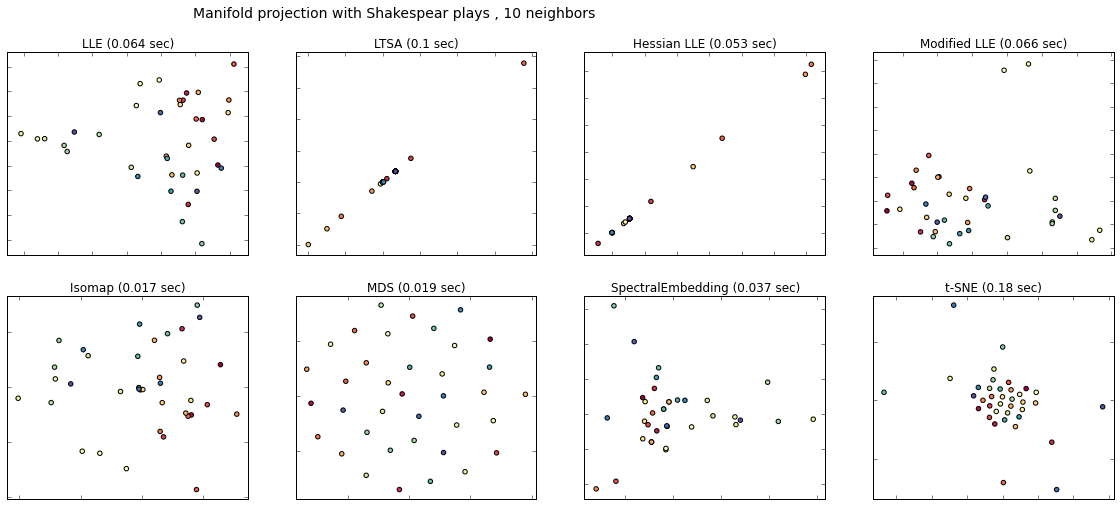


Visualizing the act_Vect features without labels... 

standard: 0.6 sec
ltsa: 0.58 sec
hessian: 0.59 sec
modified: 0.58 sec
Isomap: 0.39 sec
MDS: 0.11 sec
SpectralEmbedding: 0.4 sec
t-SNE: 1.1 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


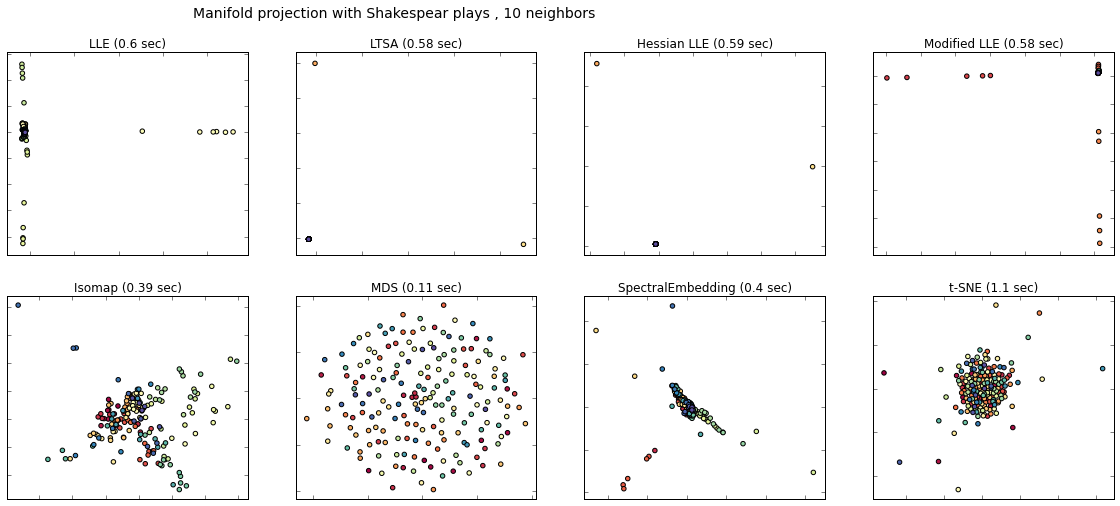


Visualizing the play_Vect_LSA features without labels... 

standard: 0.018 sec
ltsa: 0.009 sec
hessian: 0.035 sec
modified: 0.01 sec
Isomap: 0.005 sec
MDS: 0.011 sec
SpectralEmbedding: 0.01 sec
t-SNE: 0.13 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


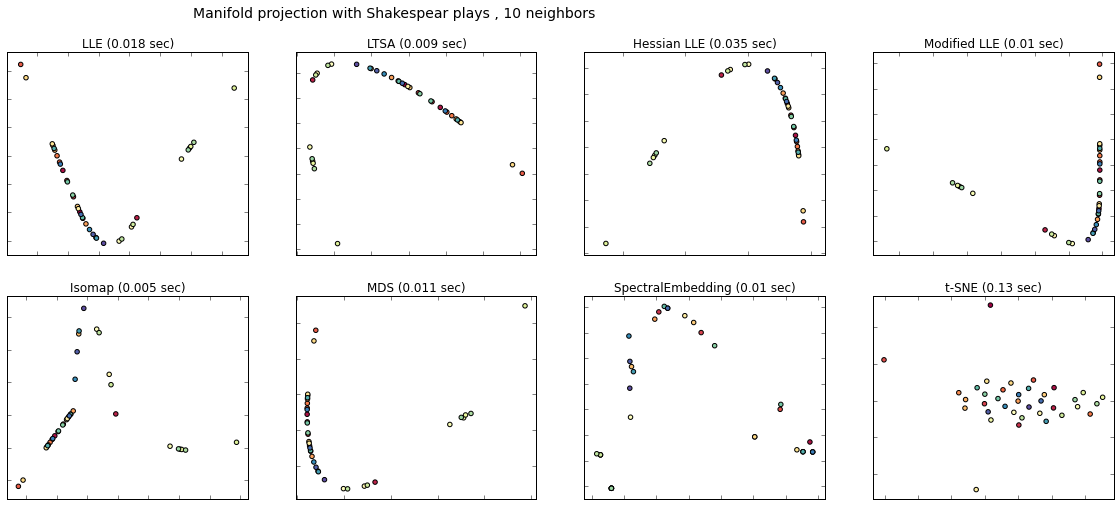


Visualizing the act_Vect_LSA features without labels... 

standard: 0.033 sec
ltsa: 0.047 sec
hessian: 0.067 sec
modified: 0.047 sec
Isomap: 0.018 sec
MDS: 0.091 sec
SpectralEmbedding: 0.046 sec
t-SNE: 0.32 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


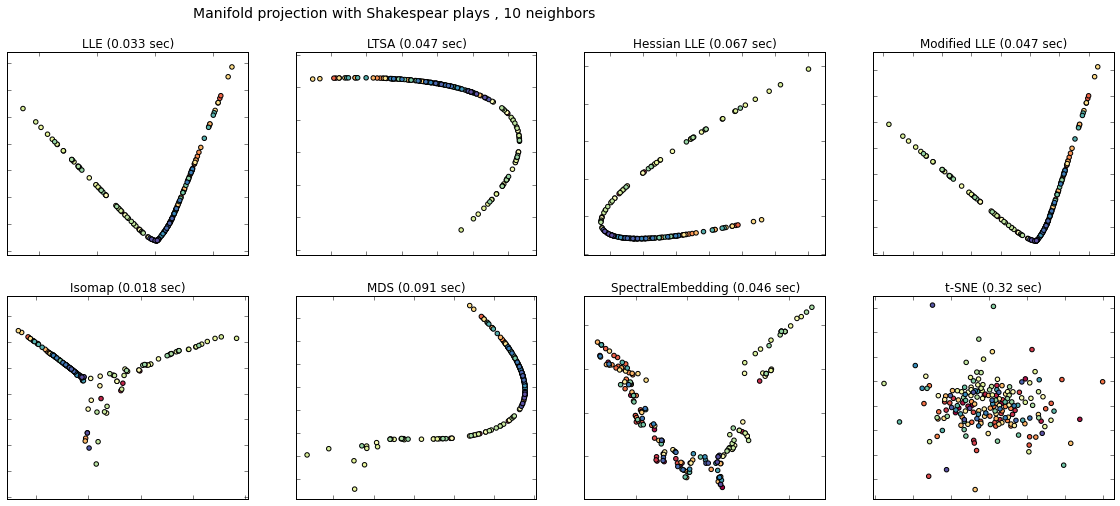


Visualizing the scene_Vect_LSA features without labels... 

standard: 0.12 sec
ltsa: 0.15 sec
hessian: 0.27 sec
modified: 0.19 sec
Isomap: 0.28 sec
MDS: 2.6 sec
SpectralEmbedding: 1.3 sec
t-SNE: 7.5 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


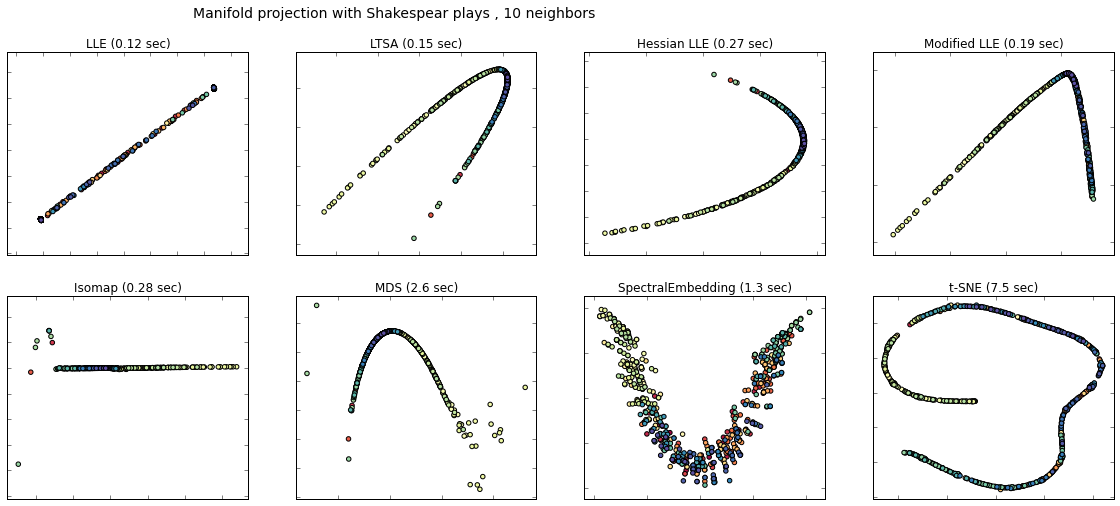

In [23]:
print("\nVisualizing the play_Vect features without labels... \n")
manifold_projection(play_Vect)
print("\nVisualizing the act_Vect features without labels... \n")
manifold_projection(act_Vect)
print("\nVisualizing the play_Vect_LSA features without labels... \n")
manifold_projection(play_Vect_LSA)
print("\nVisualizing the act_Vect_LSA features without labels... \n")
manifold_projection(act_Vect_LSA)
print("\nVisualizing the scene_Vect_LSA features without labels... \n")
manifold_projection(scene_Vect_LSA)


Visualizing the play_Vect features with labels... 

standard: 0.051 sec
ltsa: 0.065 sec
hessian: 0.061 sec
modified: 0.049 sec
Isomap: 0.019 sec
MDS: 0.019 sec
SpectralEmbedding: 0.036 sec
t-SNE: 0.18 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


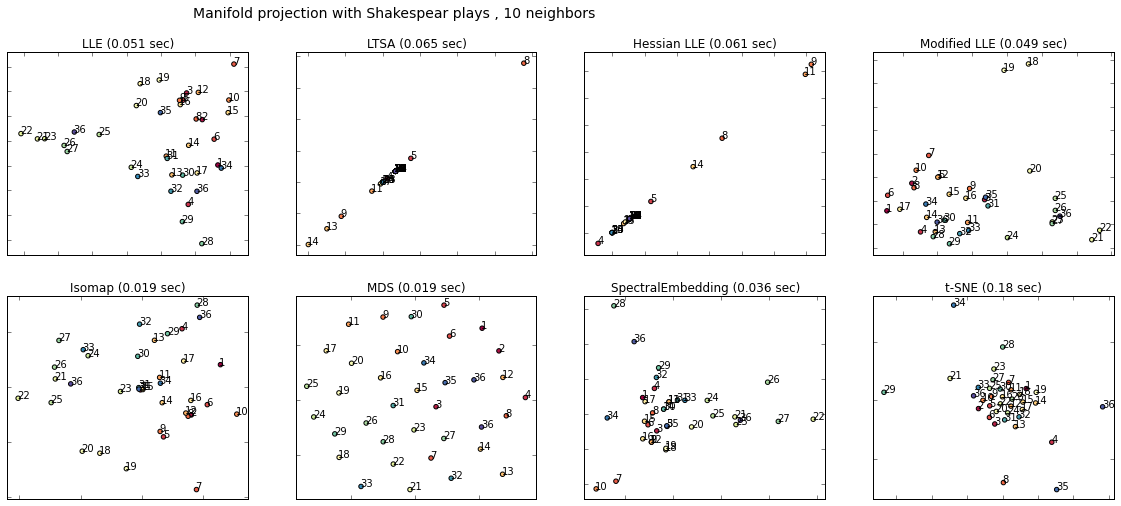


Visualizing the act_Vect features with labels... 

standard: 0.6 sec
ltsa: 0.57 sec
hessian: 0.58 sec
modified: 0.59 sec
Isomap: 0.38 sec
MDS: 0.11 sec
SpectralEmbedding: 0.37 sec
t-SNE: 1.1 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


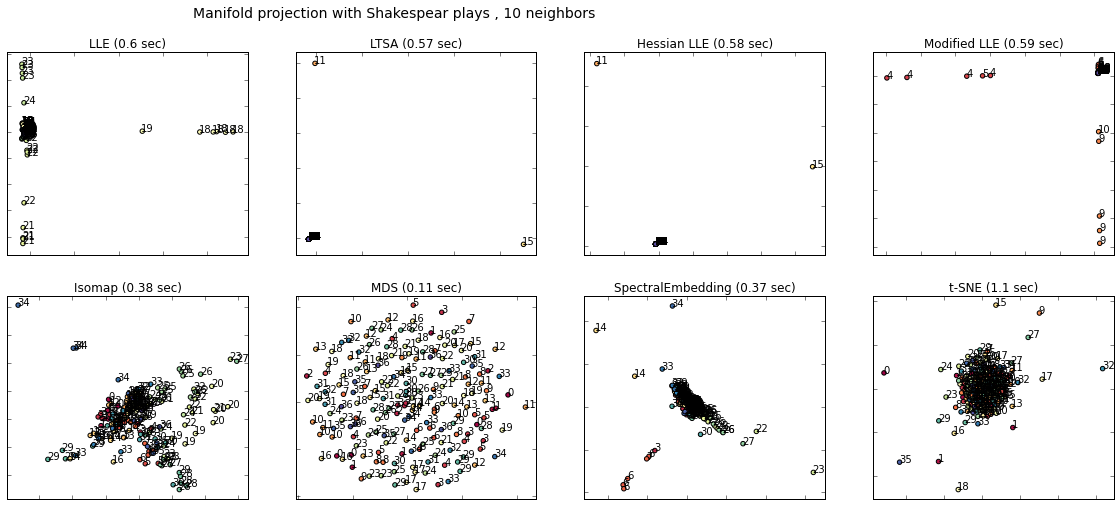


Visualizing the play_Vect_LSA features with labels... 

standard: 0.024 sec
ltsa: 0.008 sec
hessian: 0.033 sec
modified: 0.009 sec
Isomap: 0.002 sec
MDS: 0.023 sec
SpectralEmbedding: 0.01 sec
t-SNE: 0.13 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


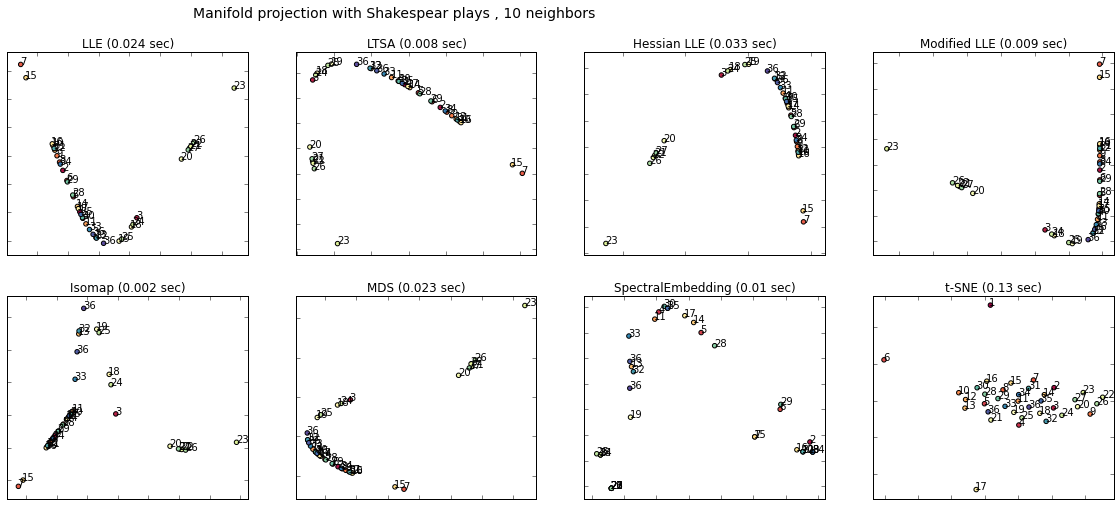


Visualizing the act_Vect_LSA features with labels... 

standard: 0.039 sec
ltsa: 0.062 sec
hessian: 0.11 sec
modified: 0.044 sec
Isomap: 0.016 sec
MDS: 0.069 sec
SpectralEmbedding: 0.042 sec
t-SNE: 0.33 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


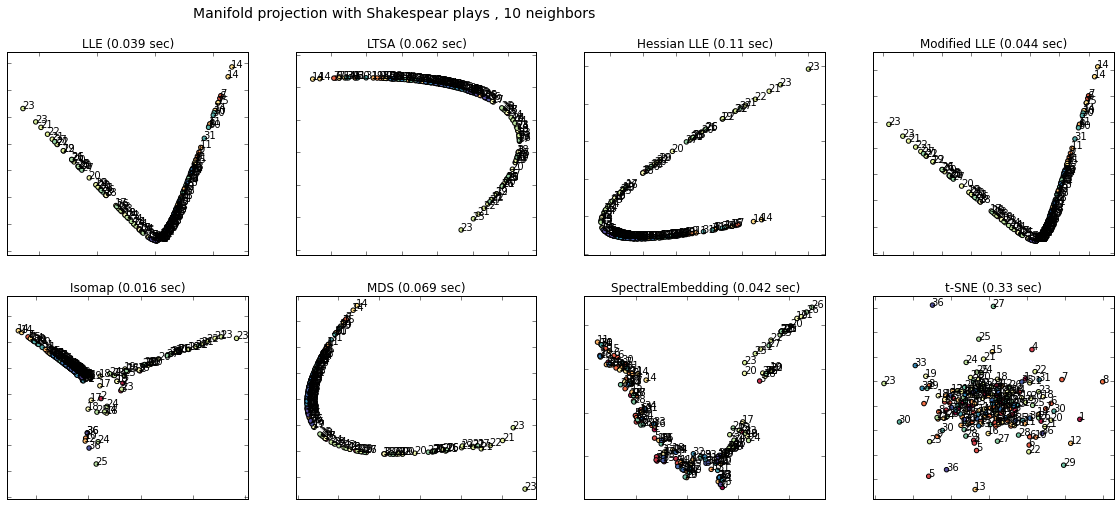


Visualizing the scene_Vect_LSA features with labels... 

standard: 0.12 sec
ltsa: 0.15 sec
hessian: 0.26 sec
modified: 0.17 sec
Isomap: 0.27 sec
MDS: 2.7 sec
SpectralEmbedding: 1.3 sec
t-SNE: 7 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


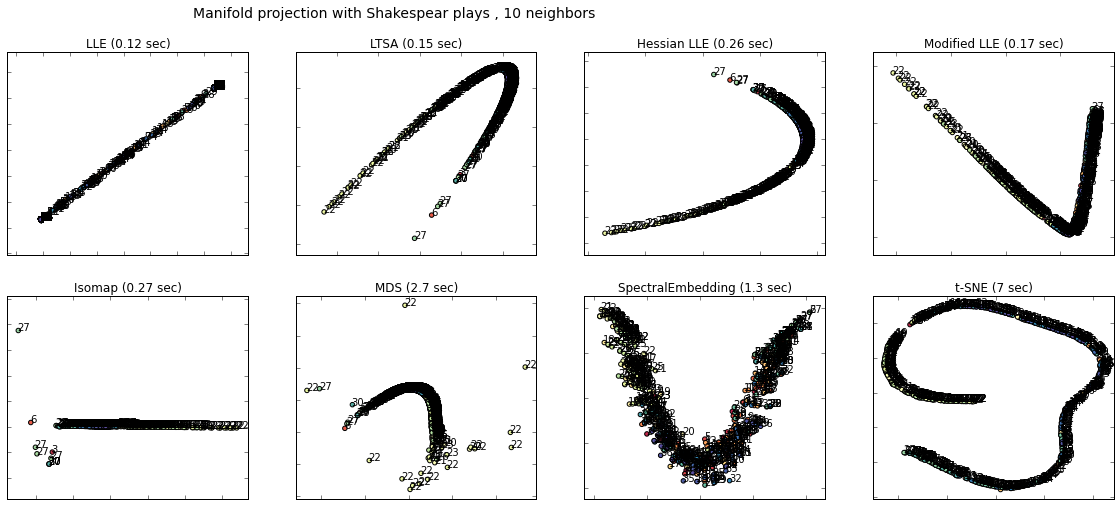

In [26]:
print("\nVisualizing the play_Vect features with labels... \n")
manifold_projection(play_Vect,play_annot)
print("\nVisualizing the act_Vect features with labels... \n")
manifold_projection(act_Vect,act_annot)
print("\nVisualizing the play_Vect_LSA features with labels... \n")
manifold_projection(play_Vect_LSA,play_annot)
print("\nVisualizing the act_Vect_LSA features with labels... \n")
manifold_projection(act_Vect_LSA,act_annot)
print("\nVisualizing the scene_Vect_LSA features with labels... \n")
manifold_projection(scene_Vect_LSA,scene_annot)